# Linear Regression

## Agenda

1. Introducing the bikeshare dataset
    - Reading in the data
    - Visualizing the data
2. Linear regression basics
    - Form of linear regression
    - Building a linear regression model
    - Using the model for prediction
    - Does the scale of the features matter?
3. Working with multiple features
    - Visualizing the data (part 2)
    - Adding more features to the model
4. Choosing between models
    - Feature selection
    - Evaluation metrics for regression problems
    - Comparing models with train/test split and RMSE
    - Comparing testing RMSE with null RMSE
5. Creating features
    - Handling categorical features
    - Feature engineering
6. Comparing linear regression with other models

## Reading in the data

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

Index(['WBAN', 'Date', 'Time', 'StationType', 'SkyCondition', 'Visibility',
       'WeatherType', 'temp', 'DryBulbCelsius', 'WetBulbFarenheit',
       'WetBulbCelsius', 'DewPointFarenheit', 'DewPointCelsius', 'humidity',
       'WindSpeed', 'WindDirection', 'ValueForWindCharacter',
       'StationPressure', 'PressureTendency', 'PressureChange',
       'SeaLevelPressure', 'RecordType', 'HourlyPrecip', 'Altimeter',
       'datetime', 'datetime_hour', 'month'],
      dtype='object')


,WBAN,Date,Time,StationType,SkyCondition,Visibility,WeatherType,temp,DryBulbCelsius,WetBulbFarenheit,...,StationPressure,PressureTendency,PressureChange,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter,datetime,datetime_hour,month
0,13743,20160101,52,11,BKN046 OVC250,10.0,,44,6.7,39,...,30.09,,,30.15,AA,,30.16,2016-01-01 00:52:00,2016-01-01 00:00:00,1
1,13743,20160101,152,11,FEW045 BKN230,10.0,,42,5.6,38,...,30.08,,,30.14,AA,,30.15,2016-01-01 01:52:00,2016-01-01 01:00:00,1
2,13743,20160101,252,11,FEW045 BKN220,10.0,,42,5.6,38,...,30.09,,,30.15,AA,,30.16,2016-01-01 02:52:00,2016-01-01 02:00:00,1
3,13743,20160101,352,11,BKN220,10.0,,42,5.6,37,...,30.07,,,30.14,AA,,30.14,2016-01-01 03:52:00,2016-01-01 03:00:00,1
4,13743,20160101,452,11,BKN180 OVC230,10.0,,42,5.6,37,...,30.07,,,30.14,AA,,30.14,2016-01-01 04:52:00,2016-01-01 04:00:00,1


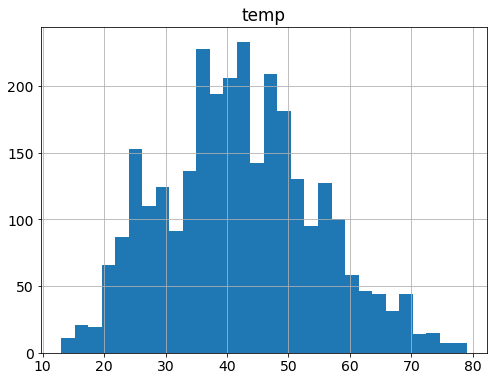

In [5]:
# read the data and set the datetime as the index
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
import pandas as pd
urls = ['../../data/KDCA-201601.csv', '../../data/KDCA-201602.csv', '../../data/KDCA-201603.csv']
frames = [pd.read_csv(url) for url in urls]
weather = pd.concat(frames)
cols = 'WBAN	Date	Time	StationType	SkyCondition	Visibility	WeatherType	DryBulbFarenheit	DryBulbCelsius	WetBulbFarenheit	WetBulbCelsius	DewPointFarenheit	DewPointCelsius	RelativeHumidity	WindSpeed	WindDirection	ValueForWindCharacter	StationPressure	PressureTendency	PressureChange	SeaLevelPressure	RecordType	HourlyPrecip	Altimeter'
cols = cols.split()
weather = weather[cols]
weather.rename(columns={'DryBulbFarenheit':'temp',
                       'RelativeHumidity': 'humidity'}, inplace=True)
# weather['humidity'] = pd.to_numeric(weather.humidity, errors='coerce')

weather['datetime'] = pd.to_datetime(weather.Date.astype(str) + weather.Time.apply('{0:0>4}'.format))
weather['datetime_hour'] = weather.datetime.dt.floor(freq='h')
weather['month'] = weather.datetime.dt.month

#bikes = pd.read_csv('../../data/2016-Q1-Trips-History-Data.csv')
bikes = pd.read_csv('../../data/2016-Q1-cabi-trip-history-data.csv')
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes['datetime_hour'] = bikes.start.dt.floor(freq='h')
weather[['datetime', 'temp']].hist(bins=30)
print(weather.columns)
weather.head()

In [6]:
bikes.merge(weather[['temp', 'datetime_hour', 'datetime']], on='datetime_hour')

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,datetime_hour,temp,datetime
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
5,967713,3/31/2016 23:57,4/1/2016 0:13,31266,11th & M St NW,31600,5th & K St NW,W20562,Casual,2016-03-31 23:57:00,2016-04-01 00:13:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
6,534836,3/31/2016 23:57,4/1/2016 0:06,31222,New York Ave & 15th St NW,31278,18th & R St NW,W20222,Registered,2016-03-31 23:57:00,2016-04-01 00:06:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
7,243864,3/31/2016 23:56,4/1/2016 0:00,31228,8th & H St NW,31600,5th & K St NW,W20291,Registered,2016-03-31 23:56:00,2016-04-01 00:00:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
8,372524,3/31/2016 23:55,4/1/2016 0:01,31113,Columbia Rd & Belmont St NW,31234,20th & O St NW / Dupont South,W20590,Registered,2016-03-31 23:55:00,2016-04-01 00:01:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00
9,215194,3/31/2016 23:55,3/31/2016 23:59,31263,10th & K St NW,31265,5th St & Massachusetts Ave NW,W21876,Registered,2016-03-31 23:55:00,2016-03-31 23:59:00,2016-03-31 23:00:00,67,2016-03-31 23:52:00


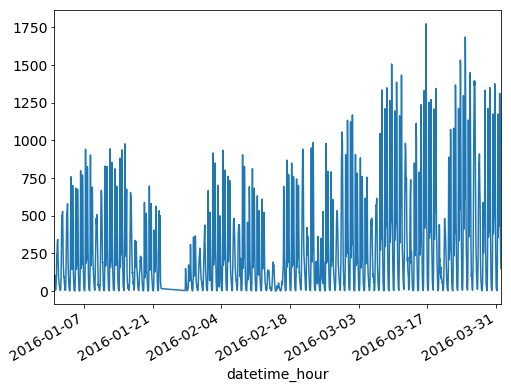

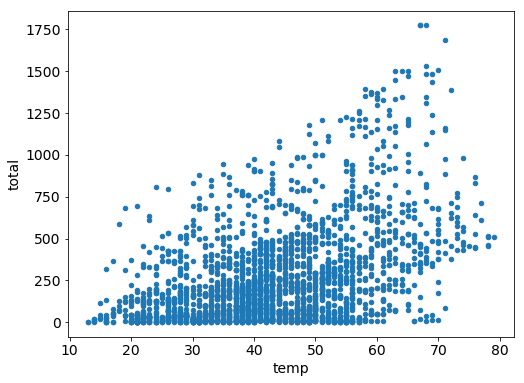

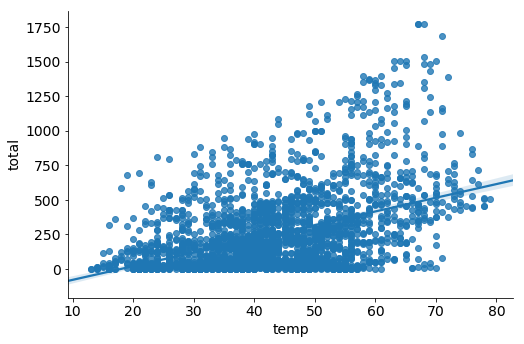

In [7]:
hours = bikes.groupby('datetime_hour').agg('count')
hours['datetime_hour'] = hours.index
hours.head()
hours['total'] = hours.start
hours = hours[['total', 'datetime_hour']]
hours.total.plot()
hours_weather = hours.merge(weather, on='datetime_hour')
hours_weather.plot(kind='scatter', x='temp', y='total')
sns.lmplot(x='temp', y='total', data=hours_weather, aspect=1.5, scatter_kws={'alpha':0.8})

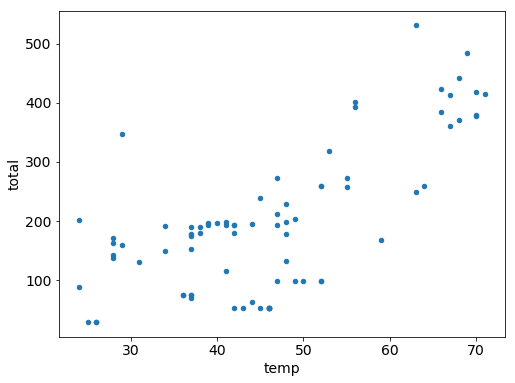

In [8]:
weekday = hours_weather[(hours_weather.datetime.dt.hour==11) & (hours_weather.datetime.dt.dayofweek<5) ]
weekday.plot(kind='scatter', x='temp', y='total')

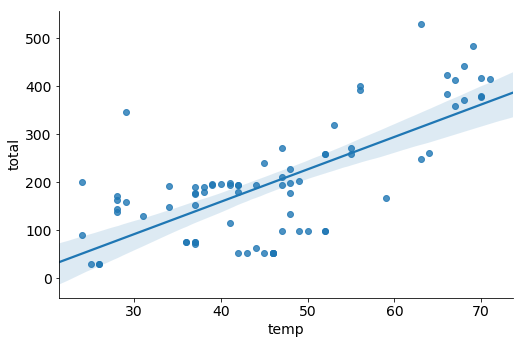

In [9]:
# import seaborn as sns

sns.lmplot(x='temp', y='total', data=weekday, aspect=1.5, scatter_kws={'alpha':0.8})

**Questions:**

- What does each observation represent?
- What is the response variable (as defined by Kaggle)?
- How many features are there?

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](../data/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

In [10]:
# create X and y
feature_cols = ['temp']
X = hours_weather[feature_cols]
y = hours_weather.total

In [11]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

-176.632263746
[ 9.88748864]


Interpreting the **intercept** ($\beta_0$):

- It is the value of $y$ when $x$=0.
- Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the **"temp" coefficient** ($\beta_1$):

- It is the change in $y$ divided by change in $x$, or the "slope".
- Thus, a temperature increase of 1 degree F is **associated with** a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in rentals.

## Using the model for prediction

How many bike rentals would we predict if the temperature was 77 degrees F?

In [13]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_ * 77

array([ 584.70436123])

In [14]:
# use the predict method
linreg.predict(77)

array([ 584.70436123])

## Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [15]:
# create a new column for Fahrenheit temperature
hours_weather['temp_C'] = (hours_weather.temp - 32) * 5/9
hours_weather.head()

,total,datetime_hour,WBAN,Date,Time,StationType,SkyCondition,Visibility,WeatherType,temp,...,StationPressure,PressureTendency,PressureChange,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter,datetime,month,temp_C
0,56,2016-01-01 00:00:00,13743,20160101,52,11,BKN046 OVC250,10.0,,44,...,30.09,,,30.15,AA,,30.16,2016-01-01 00:52:00,1,6.666667
1,105,2016-01-01 01:00:00,13743,20160101,152,11,FEW045 BKN230,10.0,,42,...,30.08,,,30.14,AA,,30.15,2016-01-01 01:52:00,1,5.555556
2,74,2016-01-01 02:00:00,13743,20160101,252,11,FEW045 BKN220,10.0,,42,...,30.09,,,30.15,AA,,30.16,2016-01-01 02:52:00,1,5.555556
3,32,2016-01-01 03:00:00,13743,20160101,352,11,BKN220,10.0,,42,...,30.07,,,30.14,AA,,30.14,2016-01-01 03:52:00,1,5.555556
4,13,2016-01-01 04:00:00,13743,20160101,452,11,BKN180 OVC230,10.0,,42,...,30.07,,,30.14,AA,,30.14,2016-01-01 04:52:00,1,5.555556


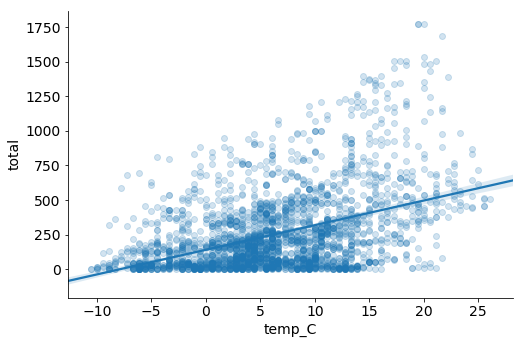

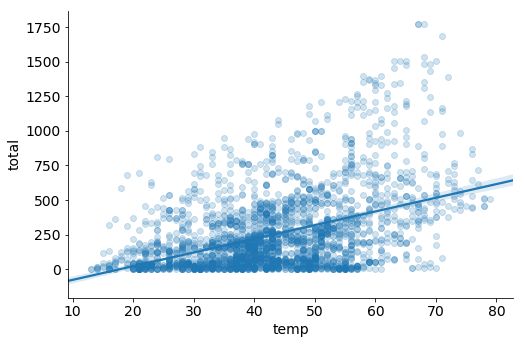

In [16]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_C', y='total', data=hours_weather, aspect=1.5, scatter_kws={'alpha':0.2})
sns.lmplot(x='temp', y='total', data=hours_weather, aspect=1.5, scatter_kws={'alpha':0.2})

In [17]:
# create X and y
feature_cols = ['temp_C']
X = hours_weather[feature_cols]
y = hours_weather.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_, linreg.coef_)

139.767372607 [ 17.79747954]


In [18]:
# convert 77 degrees Fahrenheit to Celsius
(77 - 32)* 5/9

25.0

In [19]:
# predict rentals for 25 degrees Celsius
linreg.predict([[25], [30]])

array([ 584.70436123,  673.69175895])

**Conclusion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

In [20]:
# remove the temp_F column
# bikes.drop('temp_C', axis=1, inplace=True)

## Visualizing the data (part 2)

In [21]:
# explore more features
feature_cols = ['temp', 'month', 'humidity']

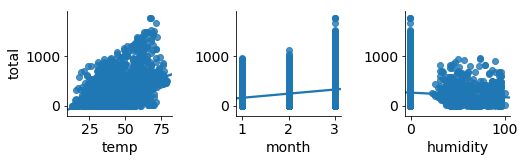

In [22]:
# multiple scatter plots in Seaborn
# print(hours_weather.humidity != 'M')
hours_weather.humidity = hours_weather.humidity.apply(lambda x: -1 if isinstance(x, str) else x)
# hours_weather.loc[hours_weather.humidity.dtype != int].humidity = 100
sns.pairplot(hours_weather, x_vars=feature_cols, y_vars='total', kind='reg')

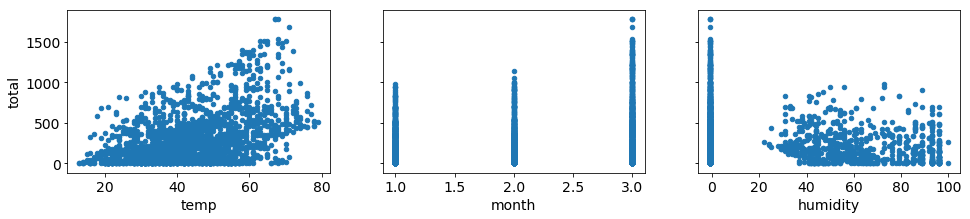

In [23]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    hours_weather.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

Are you seeing anything that you did not expect?

In [24]:
# cross-tabulation of season and month
pd.crosstab(hours_weather.month, hours_weather.datetime.dt.dayofweek)

datetime,0,1,2,3,4,5,6
month,,,,,,,
1,72,77,98,103,170,151,129
2,203,182,183,115,102,114,125
3,129,139,124,134,123,115,134


/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


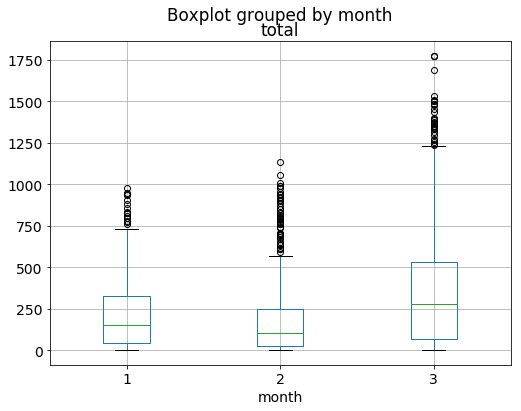

In [25]:
# box plot of rentals, grouped by season
hours_weather.boxplot(column='total', by='month')

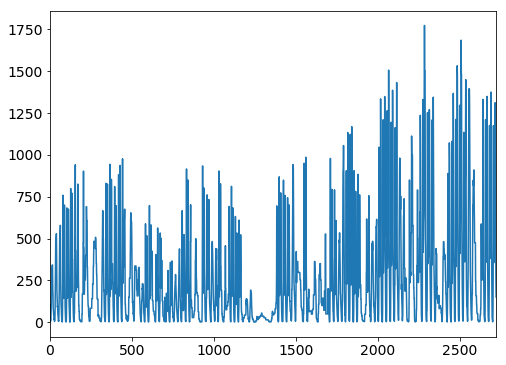

In [26]:
# line plot of rentals
hours_weather.total.plot()

What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months.

In [27]:
# correlation matrix (ranges from 1 to -1)
hours_weather.corr()

,total,WBAN,Date,Time,StationType,Visibility,temp,DryBulbCelsius,DewPointFarenheit,DewPointCelsius,humidity,Altimeter,month,temp_C
total,1.000000,NaN,0.240069,0.283064,NaN,0.224845,0.437242,0.437254,0.156470,0.156632,-0.109927,-0.038122,0.236981,0.437242
WBAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,0.240069,NaN,1.000000,-0.004699,NaN,0.168070,0.506872,0.506715,0.371529,0.371576,-0.791303,-0.037263,0.994602,0.506872
Time,0.283064,NaN,-0.004699,1.000000,NaN,0.026204,0.120424,0.120322,0.008574,0.008571,-0.025222,-0.032535,-0.007578,0.120424
StationType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visibility,0.224845,NaN,0.168070,0.026204,NaN,1.000000,0.119073,0.118922,-0.257975,-0.257868,-0.187697,0.075111,0.167172,0.119073
temp,0.437242,NaN,0.506872,0.120424,NaN,0.119073,1.000000,0.999982,0.789360,0.789495,-0.269786,-0.465325,0.499250,1.000000
DryBulbCelsius,0.437254,NaN,0.506715,0.120322,NaN,0.118922,0.999982,1.000000,0.789386,0.789520,-0.269803,-0.465342,0.499113,0.999982
DewPointFarenheit,0.156470,NaN,0.371529,0.008574,NaN,-0.257975,0.789360,0.789386,1.000000,0.999987,-0.121292,-0.533671,0.370406,0.789360
DewPointCelsius,0.156632,NaN,0.371576,0.008571,NaN,-0.257868,0.789495,0.789520,0.999987,1.000000,-0.121358,-0.533625,0.370438,0.789495


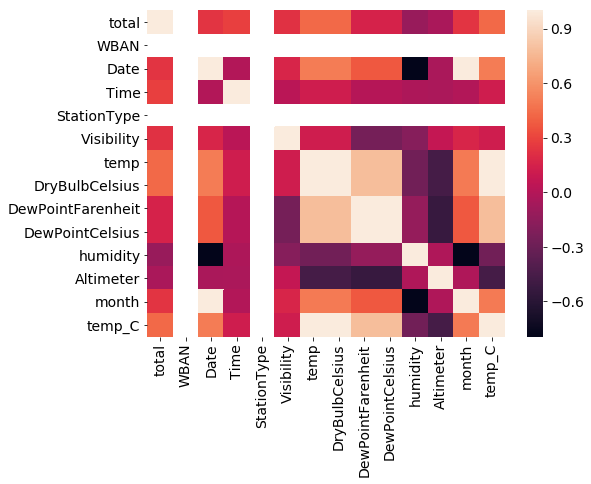

In [28]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(hours_weather.corr())

What relationships do you notice?

## Adding more features to the model

In [29]:
# create a list of features
feature_cols = ['temp', 'month', 'humidity']

In [30]:
# create X and y
X = hours_weather[feature_cols]
y = hours_weather.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_, linreg.coef_)

-226.700163985 [  9.33945424  30.62665914   0.60483008]


In [31]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp', 9.3394542400039331),
 ('month', 30.626659142038744),
 ('humidity', 0.60483007751777862)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 9.3 bikes**.
- Holding all other features fixed, a 1 unit increase in **month** is associated with a **rental increase of 30.6 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of .60 bikes**.

Does anything look incorrect?

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

## Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [32]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [33]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [34]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
rmse = np.sqrt(metrics.mean_squared_error(true, pred))
rmse/pred

MAE: 2.0
MSE: 16.0
RMSE: 4.0


array([ 0.4       ,  0.57142857,  0.8       ,  0.30769231])

## Comparing models with train/test split and RMSE

In [35]:
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import numpy as np

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols, data):
    X = data[feature_cols]
    y = data.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

/Users/JiSunPark/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
# compare different sets of features
print(train_test_rmse(['temp', 'month', 'humidity'], hours_weather))
print(train_test_rmse(['temp', 'month'], hours_weather))
print(train_test_rmse(['temp', 'humidity'], hours_weather))
print(train_test_rmse(['temp'], hours_weather))
print(train_test_rmse(['temp'], weekday))

246.451640105
246.783327002
246.572708806
246.56944026
81.4084240105


## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [37]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(weekday[['temp']], weekday.total, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 260.05,  260.05,  260.05,  260.05,  260.05,  260.05,  260.05,
        260.05,  260.05,  260.05,  260.05,  260.05,  260.05,  260.05,
        260.05,  260.05,  260.05,  260.05,  260.05,  260.05])

In [38]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

111.40173921443058

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [39]:
# create dummy variables
season_dummies = pd.get_dummies(hours_weather.month, prefix='month')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,month_1,month_2,month_3
1443,0,1,0
1152,0,1,0
1348,0,1,0
1334,0,1,0
2700,0,0,1


In general, if you have a categorical feature with **k possible values**, you create **k-1 dummy variables**.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).

In [40]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
hw_dum = pd.concat([hours_weather, season_dummies], axis=1)

# print 5 random rows
hw_dum.sample(n=5, random_state=1)

,total,datetime_hour,WBAN,Date,Time,StationType,SkyCondition,Visibility,WeatherType,temp,...,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter,datetime,month,temp_C,month_1,month_2,month_3
1443,2,2016-02-19 02:00:00,13743,20160219,252,11,CLR,10.00,,30,...,30.57,AA,,30.57,2016-02-19 02:52:00,2,-1.111111,0,1,0
1152,40,2016-02-12 05:00:00,13743,20160212,552,11,BKN180,10.00,,20,...,30.32,AA,,30.32,2016-02-12 05:52:00,2,-6.666667,0,1,0
1348,3,2016-02-16 04:00:00,13743,20160216,405,11,VV002,0.12,FZFG,31,...,M,SP,,29.83,2016-02-16 04:05:00,2,-0.555556,0,1,0
1334,8,2016-02-15 23:00:00,13743,20160215,2328,11,OVC006,7.00,-FZDZ,30,...,M,SP,,30.06,2016-02-15 23:28:00,2,-1.111111,0,1,0
2700,2,2016-03-31 03:00:00,13743,20160331,352,11,SCT250,10.00,,55,...,30.03,AA,,30.04,2016-03-31 03:52:00,3,12.777778,0,0,1


In [41]:
# include dummy variables for season in the model
feature_cols = ['temp','month_1', 'month_2', 'month_3', 'humidity']
X = hw_dum[feature_cols]
y = hw_dum.total
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))

[('temp', 9.4424422534193138),
 ('month_1', 136.77031870520071),
 ('month_2', -109.6309429610906),
 ('month_3', -27.139375744109294),
 ('humidity', -2.7144997426796067)]

In [42]:
# compare original season variable with dummy variables
print(train_test_rmse(['temp', 'month', 'humidity'], hw_dum))
print(train_test_rmse(['temp', 'month_2', 'month', 'humidity'], hw_dum))
print(train_test_rmse(['temp', 'month_2', 'month_1', 'humidity'], hw_dum))

246.451640105
240.628565747
240.628565747


## Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [43]:
# hour as a numeric feature
hw_dum['hour'] = hw_dum.datetime.dt.hour

In [44]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(hw_dum.hour, prefix='hour')
# hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
hw_dum = pd.concat([hw_dum, hour_dummies], axis=1)

In [45]:
# daytime as a categorical feature
hw_dum['daytime'] = ((hw_dum.hour > 6) & (hw_dum.hour < 21)).astype(int)

In [46]:
print(train_test_rmse(['hour'], hw_dum),
    train_test_rmse(hw_dum.columns[hw_dum.columns.str.startswith('hour_')], hw_dum)
    ,train_test_rmse(['daytime'], hw_dum))

261.836828231 212.491439752 229.412966447


## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions